In [25]:
import os
import glob
import random
import shutil

In [26]:
base_dir = 'C:\\Users\\MANU VENUGOPAL\\Downloads\\dogs-vs-cats'
base_dir

'C:\\Users\\MANU VENUGOPAL\\Downloads\\dogs-vs-cats'

In [32]:
# listing the items present in the directory

os.chdir(base_dir)
os.listdir()

['sampleSubmission.csv',
 'test',
 'test1.zip',
 'train',
 'train.zip',
 'validation']

In [33]:
# If not present adding the folder to save the input image samples 

if os.path.isdir('train\\dogs') == False:
    os.makedirs('train\\dogs')
    os.makedirs('train\\cats')
    os.makedirs('validation\\dogs')
    os.makedirs('validation\\cats')
    os.makedirs('test\\dogs')
    os.makedirs('test\\cats')

In [36]:
# Now we have created the folders. Now we need to fill these folders with images

for c in random.sample(glob.glob('train\\cat*'), 500):
    shutil.move(c, 'train\\cats')

for c in random.sample(glob.glob('train\\dog*'), 500):
    shutil.move(c, 'train\\dogs')

for c in random.sample(glob.glob('train\\cat*'), 100):
    shutil.move(c, 'validation\\cats')

for c in random.sample(glob.glob('train\\dog*'), 100):
    shutil.move(c, 'validation\\dogs')
    
for c in random.sample(glob.glob('train\\cat*'), 50):
    shutil.move(c, 'test\\cats')

for c in random.sample(glob.glob('train\\dog*'), 50):
    shutil.move(c, 'test\\dogs')

In [37]:
train_path = 'C:\\Users\\MANU VENUGOPAL\\Downloads\\dogs-vs-cats\\train'
test_path = 'C:\\Users\\MANU VENUGOPAL\\Downloads\\dogs-vs-cats\\test'
validation_path = 'C:\\Users\\MANU VENUGOPAL\\Downloads\\dogs-vs-cats\\validation'

### Preprocessing the Images

In [40]:
import tensorflow

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
image_gen =  ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.vgg16.preprocess_input)

In [44]:
train_batch = image_gen.flow_from_directory(directory=train_path, batch_size = 10, target_size = (224,224), classes = ['cats', 'dogs'])

Found 1000 images belonging to 2 classes.


In [45]:
validation_batch = image_gen.flow_from_directory(directory=validation_path, target_size=(224,224), batch_size=10, classes=['cats','dogs'])

Found 200 images belonging to 2 classes.


In [46]:
test_batch = image_gen.flow_from_directory(directory=test_path, target_size=(224,224),batch_size=10, classes=['cats', 'dogs'], shuffle=False)

Found 100 images belonging to 2 classes.


### Plotting the PreProcessed Images

In [50]:
# we will take 10 elements for plotting.
# how 10 elements? beacuse we have metnioned the batch size of 10

img, lbl = next(train_batch)
print(img)
print(lbl)

[[[[ -87.939      -96.779     -108.68     ]
   [ -86.939      -95.779     -107.68     ]
   [ -86.939      -95.779     -107.68     ]
   ...
   [ -76.939      -89.779      -96.68     ]
   [ -77.939      -90.779      -97.68     ]
   [ -87.939     -100.779     -107.68     ]]

  [[ -87.939      -96.779     -108.68     ]
   [ -86.939      -95.779     -107.68     ]
   [ -86.939      -95.779     -107.68     ]
   ...
   [ -74.939      -87.779      -94.68     ]
   [ -75.939      -88.779      -95.68     ]
   [ -83.939      -96.779     -103.68     ]]

  [[ -87.939      -96.779     -108.68     ]
   [ -87.939      -96.779     -108.68     ]
   [ -86.939      -95.779     -107.68     ]
   ...
   [ -80.939      -93.779     -100.68     ]
   [ -81.939      -94.779     -101.68     ]
   [ -84.939      -97.779     -104.68     ]]

  ...

  [[ -85.939      -97.779     -100.68     ]
   [ -86.939      -98.779     -101.68     ]
   [ -94.939     -106.779     -109.68     ]
   ...
   [ -88.939      -98.779     -107.

In [58]:
# this function is provided by the tensorflow to plot the preprocesses images
# https://www.tensorflow.org/tutorials/images/classification#visualize_training_images


import matplotlib.pyplot as plt


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

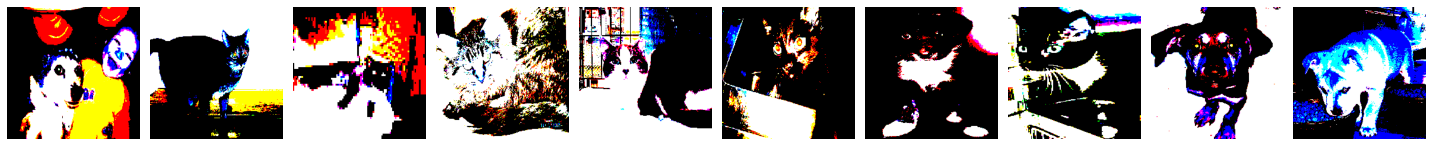

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [60]:
plotImages(img)
print(lbl)

### Building the CNN Model

In [61]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [62]:
model =  Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

### Executing the model

In [64]:
model.fit(train_batch, validation_data=validation_batch, epochs=10, verbose=2)

Epoch 1/10
100/100 - 26s - loss: 19.5643 - accuracy: 0.5280 - val_loss: 0.7098 - val_accuracy: 0.5800 - 26s/epoch - 255ms/step
Epoch 2/10
100/100 - 29s - loss: 0.5447 - accuracy: 0.7450 - val_loss: 0.7634 - val_accuracy: 0.5600 - 29s/epoch - 294ms/step
Epoch 3/10
100/100 - 29s - loss: 0.3403 - accuracy: 0.8600 - val_loss: 0.8374 - val_accuracy: 0.5750 - 29s/epoch - 294ms/step
Epoch 4/10
100/100 - 30s - loss: 0.1267 - accuracy: 0.9710 - val_loss: 1.4138 - val_accuracy: 0.5850 - 30s/epoch - 298ms/step
Epoch 5/10
100/100 - 30s - loss: 0.0335 - accuracy: 0.9900 - val_loss: 1.4514 - val_accuracy: 0.5550 - 30s/epoch - 298ms/step
Epoch 6/10
100/100 - 30s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.7645 - val_accuracy: 0.5950 - 30s/epoch - 299ms/step
Epoch 7/10
100/100 - 30s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.9143 - val_accuracy: 0.5900 - 30s/epoch - 297ms/step
Epoch 8/10
100/100 - 30s - loss: 7.6827e-04 - accuracy: 1.0000 - val_loss: 1.9994 - val_accuracy: 0.5750 - 30s/epoch 

### Prediction and Evaluation of CNN model

In [65]:
prediction = model.predict(test_batch, verbose=0)

In [68]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

<AxesSubplot:>

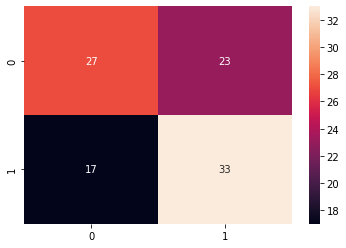

In [69]:
sns.heatmap(confusion_matrix(test_batch.classes, np.argmax(prediction, axis= -1)), annot=True)

In [70]:
accuracy_score(test_batch.classes, np.argmax(prediction, axis= -1))

0.6

### We can see that model is overfitting
### To avoid overfitting We will add Early stopping 

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(patience=3, monitor='val_loss')

In [74]:
model.fit(x=train_batch, validation_data=validation_batch,
         epochs=10, verbose=2,
         callbacks=[early_stop])

Epoch 1/10
100/100 - 42s - loss: 2.8061e-04 - accuracy: 1.0000 - val_loss: 2.1825 - val_accuracy: 0.5900 - 42s/epoch - 425ms/step
Epoch 2/10
100/100 - 45s - loss: 2.2365e-04 - accuracy: 1.0000 - val_loss: 2.2290 - val_accuracy: 0.5800 - 45s/epoch - 452ms/step
Epoch 3/10
100/100 - 45s - loss: 1.8210e-04 - accuracy: 1.0000 - val_loss: 2.2624 - val_accuracy: 0.5850 - 45s/epoch - 448ms/step
Epoch 4/10
100/100 - 45s - loss: 1.5118e-04 - accuracy: 1.0000 - val_loss: 2.2954 - val_accuracy: 0.5850 - 45s/epoch - 446ms/step
